# Lab IV: Linear Models
## Mason Nicoletti

### Q0.

1. A linear model is "linear" in the sense that we can estimate a regression line from existing data observations. Linear models use a straight line to predict a relationships between variables.

2. One-hot encoding breaks up a categorical variable into multiple separate features. This means the descendent dummy variables from one-hot encoding introduce **multicollinear**, where the resulting columns are redundant and can be predicted from each other. As a result, this may produce singularity and act as a detriment to the model. In order to interpret the coefficient for a dummy variable, it is best practice to omit a column from each category after one-hot encoding a categorical variable. Doing so will remove redundancy and ensure that the remaining dummy variables are independent. Now, the coefficient is the frequency of the observation for a categorical variable relative to the dropped category.

3. Even though linear regression is continuous and classification is discrete, it is possible to use linear regression for classification by revealing distinct relationships between multiple variables that can be used to group observations into different clusters.

4. If the model is highly accurate on the training data but not very accurate on the testing data, this is a sign of **overfitting**. If the model is so highly attuned to fit the training data that it does not generalize well to the test data, it will also not generalize well to additional data.

5. One option to incorporate a nonlinear relationship between target variables and features is to create a new feature from an existing x variable that simply raises that variable to a different power. This is an example of manually creating a polynomial feature. `sklearn.preprocessing.PolynomialFeatures` can also be used to create polynomial features. Another option is to use a 'kernel' that will assign a weight to each sample. This process can be done with support vector machine used on a polynomial kernel. A support vector machine can be imported from `sklearn.svm` and done with the `SVR`, setting `kernel='poly'`.

6. The intercept represents the value of the target variable when the independent variable equals zero. The slope coefficient for a variable is the rate at which the target variable increases given an increase in the independent variable. Both of these factors are important for determining the relationships between features and the target in linear regression. The coefficient for a dummy variable can be interpreted as the amount the target variable would vary for the feature compared to the categorical variable that was omitted during the one-hot encoding process for a linear model.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


### Q1. NYC Property Data

In [3]:
# Load in data
nyc_prop = pd.read_csv("../data/Q1_clean.csv")

#nyc_prop.info()

                    Price  Review Scores Rating
Neighbourhood                                  
Manhattan      183.664286             91.801496
Staten Island  146.166667             90.843750
Brooklyn       127.747378             92.363497
Queens          96.857233             91.549057
Bronx           75.276498             91.654378


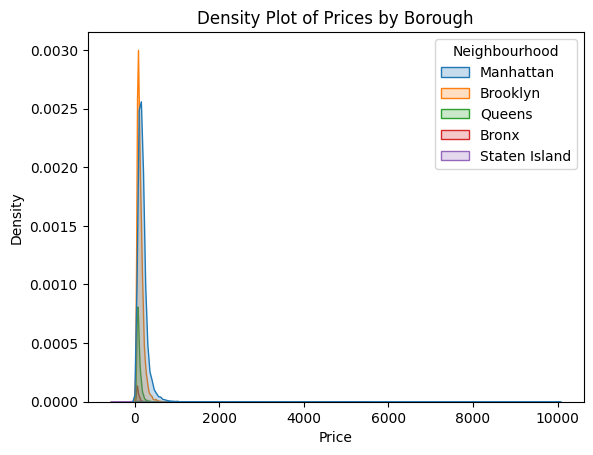

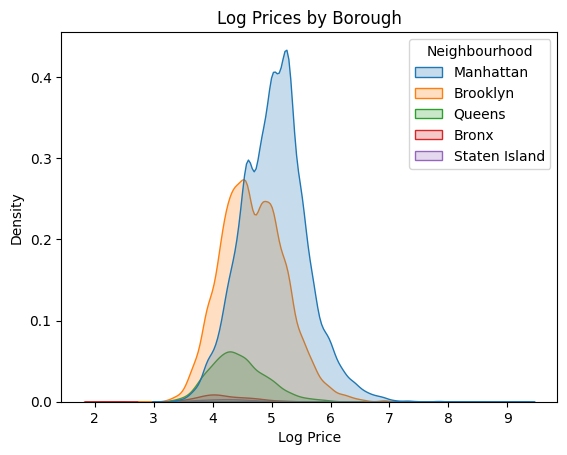

In [ ]:
# Q1.1

'''
Compute the average prices and scores by Neighborhood; which borough is the most expensive on average? 
Create a kernel density plot of price and log price, grouping by Neighborhood.
'''

# Load in data
nyc_prop = pd.read_csv("../data/Q1_clean.csv")

# Group by neighborhood
nyc_prop.rename(columns = {'Neighbourhood ': 'Neighbourhood'}, inplace= True)
neighborhoods = nyc_prop.groupby("Neighbourhood")

# Compute the average prices and scores by neighborhood
ave_price_score_by_borough = neighborhoods[["Price", "Review Scores Rating"]].mean().sort_values(by='Price', ascending=False)
print(ave_price_score_by_borough)

# Create kde plot of price grouped by neighborhood
sns.kdeplot(data = nyc_prop, x="Price", hue="Neighbourhood", fill=True)
plt.title("Density Plot of Prices by Borough")
plt.show()

# Add a column to the dataframe for Log Price
nyc_prop["Log Price"] = np.log(nyc_prop['Price'])

# Create a kde plot of log price group by neighborhood
sns.kdeplot(data = nyc_prop, x="Log Price", hue="Neighbourhood", fill=True)
plt.title("Log Prices by Borough")
plt.show()


Q1.1

On average, Manhattan is the borough with the most expensive properties.

In [23]:
# Q1.2

'''
Regress price on Neighborhood by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model. 
Compare the coefficients in the regression to the table from part 1. 
What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
'''

# Load in data
nyc_prop = pd.read_csv("../data/Q1_clean.csv")
nyc_prop.rename(columns = {'Neighbourhood ': 'Neighbourhood'}, inplace= True)

# One-hot Encoding fot Neighborhoods
nyc_prop = pd.get_dummies(nyc_prop, columns = ['Neighbourhood'])

# Define features
features = nyc_prop.iloc[:, -5:]
target = nyc_prop['Price']

# Regress Price on Neighbourhood and get the coefficients
model = LinearRegression(fit_intercept=False)
model.fit(features, target)
coef = model.coef_

# Arrange coefficients in a table
coefficients = pd.DataFrame({'Coefficient': coef}, index = features.columns).sort_values(by="Coefficient", ascending=False)


print("Coefficient Table:\n", coefficients)
print('\nComparison Table from Q1.1:\n', ave_price_score_by_borough['Price'])


Coefficient Table:
                              Coefficient
Neighbourhood_Manhattan       183.664286
Neighbourhood_Staten Island   146.166667
Neighbourhood_Brooklyn        127.747378
Neighbourhood_Queens           96.857233
Neighbourhood_Bronx            75.276498

Comparison Table from Q1.1:
 Neighbourhood
Manhattan        183.664286
Staten Island    146.166667
Brooklyn         127.747378
Queens            96.857233
Bronx             75.276498
Name: Price, dtype: float64


Q1.2

These coefficients are the same as the average prices for each borough found in Q1.1. This means that the coefficients are just the average value of the target variable for each category.

In [27]:
# Q1.3

'''
Repeat part 2, but leave an intercept in the linear model. 
How do you have to handle the creation of the dummies differently? 
What is the intercept? Interpret the coefficients. 
How can I get the coefficients in part 2 from these new coefficients?
'''

# Load in data
nyc_prop = pd.read_csv("../data/Q1_clean.csv")
nyc_prop.rename(columns = {'Neighbourhood ': 'Neighbourhood'}, inplace=True)

# One-hot Encoding fot Neighborhoods
nyc_prop = pd.get_dummies(nyc_prop, columns = ['Neighbourhood'], drop_first=True)

# Define features
features = nyc_prop.iloc[:, -4:]
target = nyc_prop['Price']

# Regress Price on Neighbourhood and get the coefficients
model = LinearRegression(fit_intercept=True)
model.fit(features, target)
coef = model.coef_
intercept = model.intercept_

# Arrange coefficients in a table
coefficients = pd.DataFrame({'Coefficient': coef}, index = features.columns).sort_values(by="Coefficient", ascending=False)

print("Intercept:\n", intercept, "\n")
print("Coefficient Table:\n", coefficients)


Intercept:
 75.2764976958471 

Coefficient Table:
                              Coefficient
Neighbourhood_Manhattan       108.387789
Neighbourhood_Staten Island    70.890169
Neighbourhood_Brooklyn         52.470881
Neighbourhood_Queens           21.580735


Q1.3

In this question, you have to drop one of the categories when creating dummy variables, indicated by `drop_first = True`. This needs to be done in order to fit the model with an intercept because the intercept serves as a comparison to the category that was dropped. In this case, it is the mean price for the Bronx borough.

Now that the linear model is fitted with an intercept, the coefficients for the other four boroughs are different than just the mean value. This is because this updated model incorporates a y-intercept - a predicted y value for when x = 0 - causing the slope to vary. This creates a better fitting regression line for the data. The coefficients for the NYC Boroughs are now smaller because, thanks to the y-intercept, the slope of the line can be flatter to best fit the data points and minimize error. The coefficients in part 2 can be obtained from the coefficients found in this question by adding the y-intercept to the coefficient for each borough individually.

In [131]:
# Q1.4

'''
Split the sample 80/20 into a training and a test set. 
Run a regression of Price on Review Scores Rating and Neighborhood. 
What is the R2 and RMSE on the test set? 
What is the coefficient on Review Scores Rating? 
What is the most expensive kind of property you can rent?
'''

# Load in data
nyc_prop = pd.read_csv("../data/Q1_clean.csv")
nyc_prop.rename(columns = {'Neighbourhood ': 'Neighbourhood'}, inplace=True)

# Set up features and target variable
nyc_prop = pd.get_dummies(nyc_prop, columns = ['Neighbourhood'], drop_first=True)
x = nyc_prop[['Review Scores Rating', 'Neighbourhood_Brooklyn', 'Neighbourhood_Manhattan', 'Neighbourhood_Queens', 'Neighbourhood_Staten Island']]
y = nyc_prop["Price"]

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

# Run a regression of Price on Review Scores Rating and Neighborhood. 
model = LinearRegression()
model.fit(x_train, y_train)

# Determine coefficients and intercept
coef = model.coef_.round(3)
intercept = model.intercept_.round(3)

# Calculate R2 and RMSE on the test set
pred = model.predict(x_test)
R2 = r2_score(y_test, pred)
MSE = mean_squared_error(y_test, pred)
RMSE = MSE ** 0.5

# Assemble table of coefficients
coefficient_table = pd.DataFrame({'Intercept': intercept, 'Coefficient': coef}, index = x.columns)

# Output
print("R2:", R2)
print("RMSE:", RMSE)

print("Coefficient of Review Scores Rating:", coefficient_table.loc['Review Scores Rating', 'Coefficient'])

print(coefficient_table)

R2: 0.030466916067505845
RMSE: 199.51443911906475
Coefficient of Review Scores Rating: 1.1
                             Intercept  Coefficient
Review Scores Rating           -25.169        1.100
Neighbourhood_Brooklyn         -25.169       51.997
Neighbourhood_Manhattan        -25.169      107.111
Neighbourhood_Queens           -25.169       21.806
Neighbourhood_Staten Island    -25.169       83.344


Q1.4

The most expensive kinds of properties to rent are in Manhattan. The coefficient for Manhattan is the greatest.

In [136]:
# Q1.5

'''
Run a regression of Price on Review Scores Rating and Neighborhood and Property Type. 
What is the R2 and RMSE on the test set? What is the coefficient on Review Scores Rating? 
What is the most expensive kind of property you can rent?
'''

# Load in data
nyc_prop = pd.read_csv("../data/Q1_clean.csv")
nyc_prop.rename(columns = {'Neighbourhood ': 'Neighbourhood'}, inplace=True)

# One-hot Encoding for Property Type
prop_type = ["Apartment", "House"]
nyc_prop["Property Type"] = (nyc_prop['Property Type'].apply(lambda x: x if x in prop_type else 'Other')).astype('category')
nyc_prop = pd.get_dummies(nyc_prop, columns = ["Neighbourhood", "Property Type"], drop_first=True)

# Set up features and target variable
x = pd.concat([nyc_prop[['Review Scores Rating']], nyc_prop.iloc[:, -6:]], axis=1)
y = nyc_prop['Price']

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

# Regression
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
coefs = model.coef_.round(3)
intercept = model.intercept_.round(3)

# Calculate error
R2 = r2_score(y_test, pred)
MSE = mean_squared_error(y_test, pred)
RMSE = MSE ** 0.5

# Create a coefficient table
coef_table = pd.DataFrame({"Intercept": intercept, "Coefficients": coefs}, index = x.columns)

# Output
print("R2:", R2)
print("RMSE:", RMSE)
print("Coefficient of Review Scores Rating:", coefficient_table.loc['Review Scores Rating', 'Coefficient'])

coef_table

R2: 0.09253938627617131
RMSE: 101.58694357466098
Coefficient of Review Scores Rating: 1.1


,Intercept,Coefficients
Review Scores Rating,-45.096,1.110
Neighbourhood_Brooklyn,-45.096,64.076
Neighbourhood_Manhattan,-45.096,126.348
Neighbourhood_Queens,-45.096,28.696
Neighbourhood_Staten Island,-45.096,71.938
Property Type_House,-45.096,36.669
Property Type_Other,-45.096,49.380


Q1.5

The most expensive properties to rent are in Manhattan, and the most expensive property types fall into the category of properties other than apartments or houses. This other category includes properties such as condominiums, villas, townhouses, bed & breakfast, and more.

Q1.6

*What does the coefficient on Review Scores Rating mean if it changes from part 4 to 5?*

If the coefficient on `Review Scores Rating` changes, that means it is contributing a different weight to the model. For instance, if the coefficient is smaller in part 5 compared to part 4, that means that `Review Scores Rating` contributes less to the regression model due to the addition of the `Property Type` variable, which has an influence on the prediction of `Price`.

In [152]:
# Q1.7

'''
We've included Neighborhood and Property Type separately in the model. 
How do you interact them, so you can have “A bedroom in Queens” or “A townhouse in Manhattan”. 
Split the sample 80/20 into a training and a test set and run a regression including that kind of “property type X neighborhood” dummy, plus Review Scores Rating. 
How does the slope coefficient for Review Scores Rating, the R2 , and the RMSE change? 
Do they increase significantly compares to part 5? 
Are the coefficients in this regression just the sum of the coefficients for Neighbourhood and Property Type from 5? 
What is the most expensive kind of property you can rent?
'''

# Load in data
nyc_prop = pd.read_csv("../data/Q1_clean.csv")
nyc_prop.rename(columns = {'Neighbourhood ': 'Neighbourhood'}, inplace=True)

# Create interaction terms for Neighborhood and Property Type
prop_type = ["Apartment", "House"]
nyc_prop["Property Type"] = (nyc_prop['Property Type'].apply(lambda x: x if x in prop_type else 'Other'))
nyc_prop['Neighborhood_PropertyType'] = nyc_prop['Neighbourhood'] + " " + nyc_prop['Property Type']

# Create dummy variables for the interaction terms
dummies = pd.get_dummies(nyc_prop['Neighborhood_PropertyType'], drop_first=True)

# Combine the dummy variables with the original DataFrame
nyc_prop = pd.concat([nyc_prop, dummies], axis=1)

# Define the target variable and the features
X = nyc_prop[['Review Scores Rating']].join(dummies)
y = nyc_prop['Price']

# Split the data into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R² and RMSE on the test set
R2 = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = MSE ** 0.5

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Create a DataFrame to display the intercept and coefficients
coef_table = pd.DataFrame({'Intercept': intercept, 'Coefficient': coefficients}, index=X.columns)

print("R2:", R2)
print("RMSE:", RMSE)
print("Coefficient of Review Scores Rating:", coef_table.loc['Review Scores Rating', 'Coefficient'])
print("Coefficients:")
print(coef_table)


R2: 0.059135580525122355
RMSE: 139.9392644715771
Coefficient of Review Scores Rating: 1.2267245208010096
Coefficients:
                         Intercept  Coefficient
Review Scores Rating    -36.572313     1.226725
Bronx House             -36.572313    -4.226168
Bronx Other             -36.572313    41.207007
Brooklyn Apartment      -36.572313    47.100104
Brooklyn House          -36.572313    79.926802
Brooklyn Other          -36.572313    62.988466
Manhattan Apartment     -36.572313   103.169693
Manhattan House         -36.572313   237.234691
Manhattan Other         -36.572313   216.280119
Queens Apartment        -36.572313    20.734499
Queens House            -36.572313    19.924438
Queens Other            -36.572313    13.973301
Staten Island Apartment -36.572313    23.990765
Staten Island House     -36.572313    23.864347
Staten Island Other     -36.572313    -7.059618


Q1.7

The coefficients for Neighborhood and Property Type combines became more specific than just those variables separately. The R2 and RMSE did not significantly change from part 4 and part 5. The most expensive properties are Houses in Manhattan. Other types of properties in Manhattan are the second most expensive. Manhattan in general is just the most expensive place to own a property - apartments are also very expensive in this borough, significantly more so than the other boroughs.